In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max.columns', 101)
df = pd.read_csv(r"C:\Users\user\Documents\survey_results_public.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [3]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly', 'Industry']]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis = 1)
df = df.drop(0,axis=0)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Industry
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0,"Information Services, IT, Software Development..."
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0,"Information Services, IT, Software Development..."
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0,NaN
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0,Other
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89183 entries, 1 to 89183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   EdLevel       87973 non-null  object 
 2   YearsCodePro  66136 non-null  object 
 3   Employment    87898 non-null  object 
 4   Salary        48019 non-null  float64
 5   Industry      36774 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.1+ MB


<Axes: >

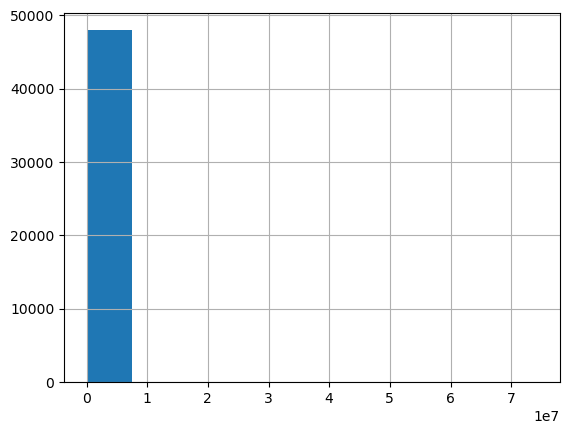

In [5]:
df['Salary'].hist()


In [6]:
df['Salary'].describe().astype('int')

count       48019
mean       103110
std        681418
min             1
25%         43907
50%         74963
75%        121641
max      74351432
Name: Salary, dtype: int32

In [7]:
median_value = df['Salary'].median()
print(f'Median Value: {median_value}')
df['Salary'].fillna(median_value, inplace=True)

Median Value: 74963.0


C:\Users\user\AppData\Local\Temp\ipykernel_9260\132502787.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(median_value, inplace=True)


In [8]:
df = df.dropna()

In [9]:
df[df['Country'] == 'Nigeria']['Employment'].value_counts()

Employment
Employed, full-time                                                                             55
Employed, full-time;Independent contractor, freelancer, or self-employed                        23
Independent contractor, freelancer, or self-employed                                            21
Employed, part-time                                                                              7
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time     4
Independent contractor, freelancer, or self-employed;Employed, part-time                         4
Name: count, dtype: int64

In [10]:
#lets check the count value of Nigeria
len(df[df['Country'] == 'Nigeria'])

114

In [11]:
df['Country'].value_counts()

Country
United States of America                                7815
Germany                                                 2812
India                                                   2364
United Kingdom of Great Britain and Northern Ireland    2228
Canada                                                  1397
                                                        ... 
Democratic People's Republic of Korea                      1
Belize                                                     1
Gabon                                                      1
Tajikistan                                                 1
Senegal                                                    1
Name: count, Length: 166, dtype: int64

In [12]:
df['Employment'].value_counts().head(15)

Employment
Employed, full-time                                                                             29447
Employed, full-time;Independent contractor, freelancer, or self-employed                         2621
Independent contractor, freelancer, or self-employed                                             1682
Employed, part-time                                                                               636
Independent contractor, freelancer, or self-employed;Employed, part-time                          169
Employed, full-time;Employed, part-time                                                           130
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      101
I prefer not to say                                                                                34
Employed, full-time;Retired                                                                         7
Independent contractor, freelancer, or self-employed;Retired           

In [13]:
Employement_teir =  ['Employed, full-time',                                                                              
                     'Employed, full-time;Independent contractor, freelancer, or self-employed',                       
                     'Independent contractor, freelancer, or self-employed',                                           
                     'Employed, part-time',                                                                             
                     'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',     
                     'Independent contractor, freelancer, or self-employed;Employed, part-time']  

In [14]:
df = df[df['Employment'].isin(Employement_teir)]
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34656 entries, 1 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34656 non-null  object 
 1   EdLevel       34656 non-null  object 
 2   YearsCodePro  34656 non-null  object 
 3   Salary        34656 non-null  float64
 4   Industry      34656 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [15]:
def shorten_cat(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [16]:
country_map = shorten_cat(df.Country.value_counts(), 114)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                7778
Other                                                   2808
Germany                                                 2800
India                                                   2354
United Kingdom of Great Britain and Northern Ireland    2228
Canada                                                  1393
France                                                  1071
Poland                                                   978
Brazil                                                   916
Netherlands                                              842
Italy                                                    777
Australia                                                744
Spain                                                    736
Sweden                                                   628
Switzerland                                              455
Israel                                                   401
Czech Republic  

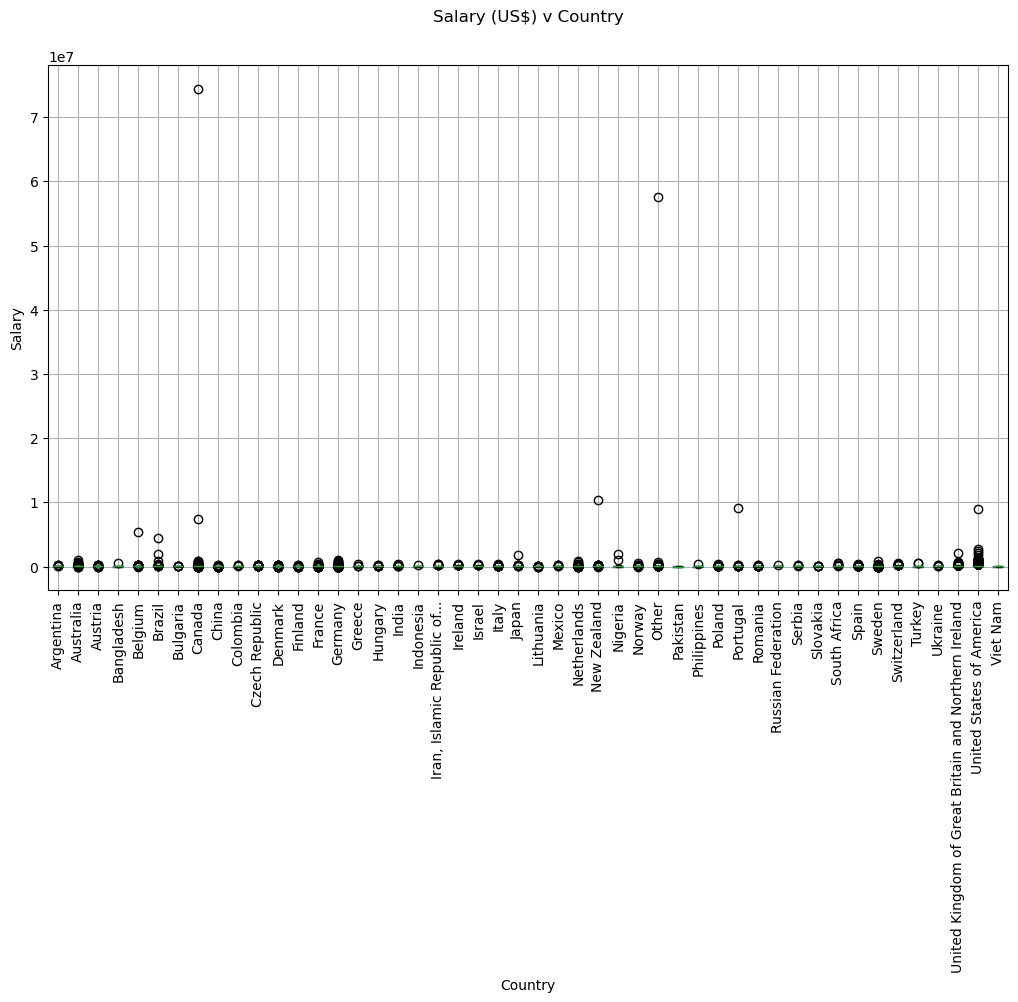

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
#Salary ranging from 0 to 2million
#these black dots are outliers and there are a lot of outliers
#most data points are in the box median area so we want to keep only the data where we have the most info

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'Philippines'),
  Text(2, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Africa'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Bangladesh'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Argentina'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Other'),
  Text(15, 0, 'Lithuania'),
  Text(16, 0, 'Serbia'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Russian Federation'),
  Text(19, 0, 'Brazil'),
  Text(20, 0, 'Australia'),
  Text(21, 0, 'Greece'),
  Text(22, 0, 'Denmark'),
  Text(23, 0, 'Norway'),
  Text(24, 0, 'Hungary'),
  Text(25, 0, 'Turkey'),
  Text(26, 0, 'Sweden'),
  Text(

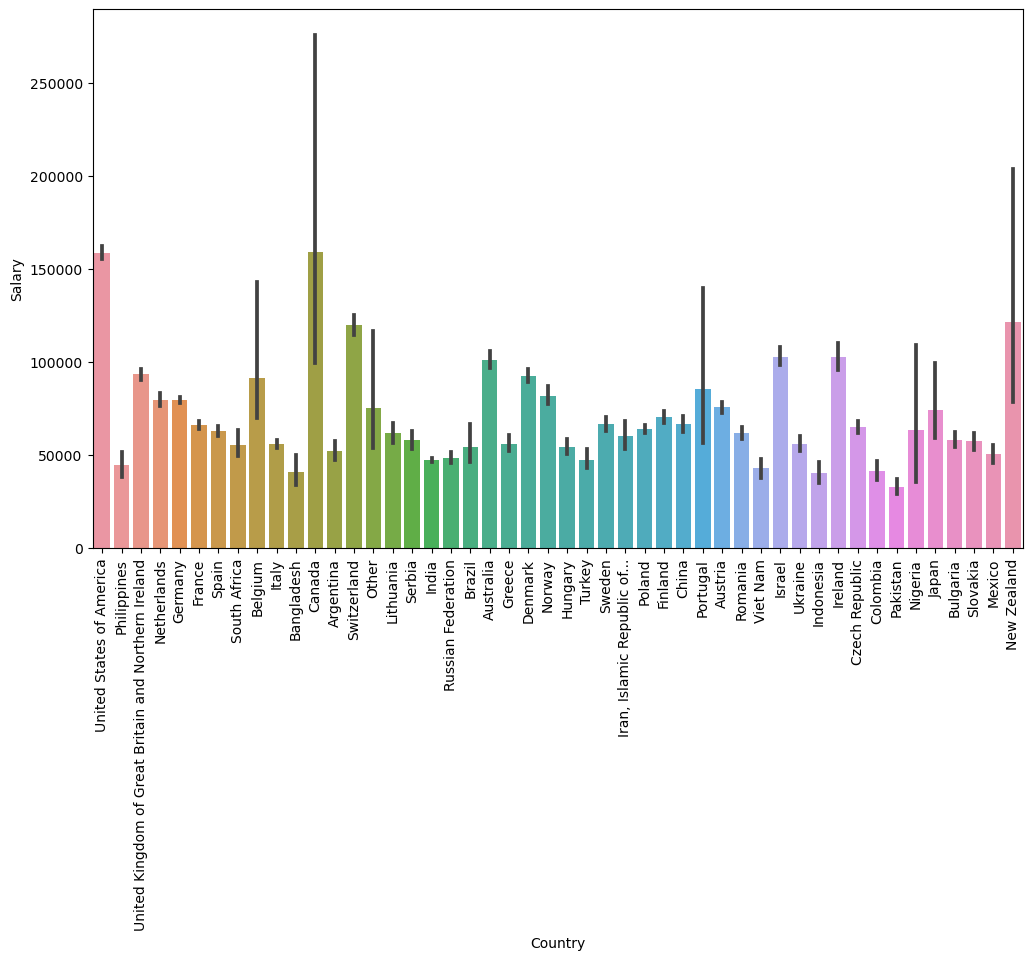

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(x='Country', y='Salary', data=df)
plt.xticks(rotation=90)

In [19]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

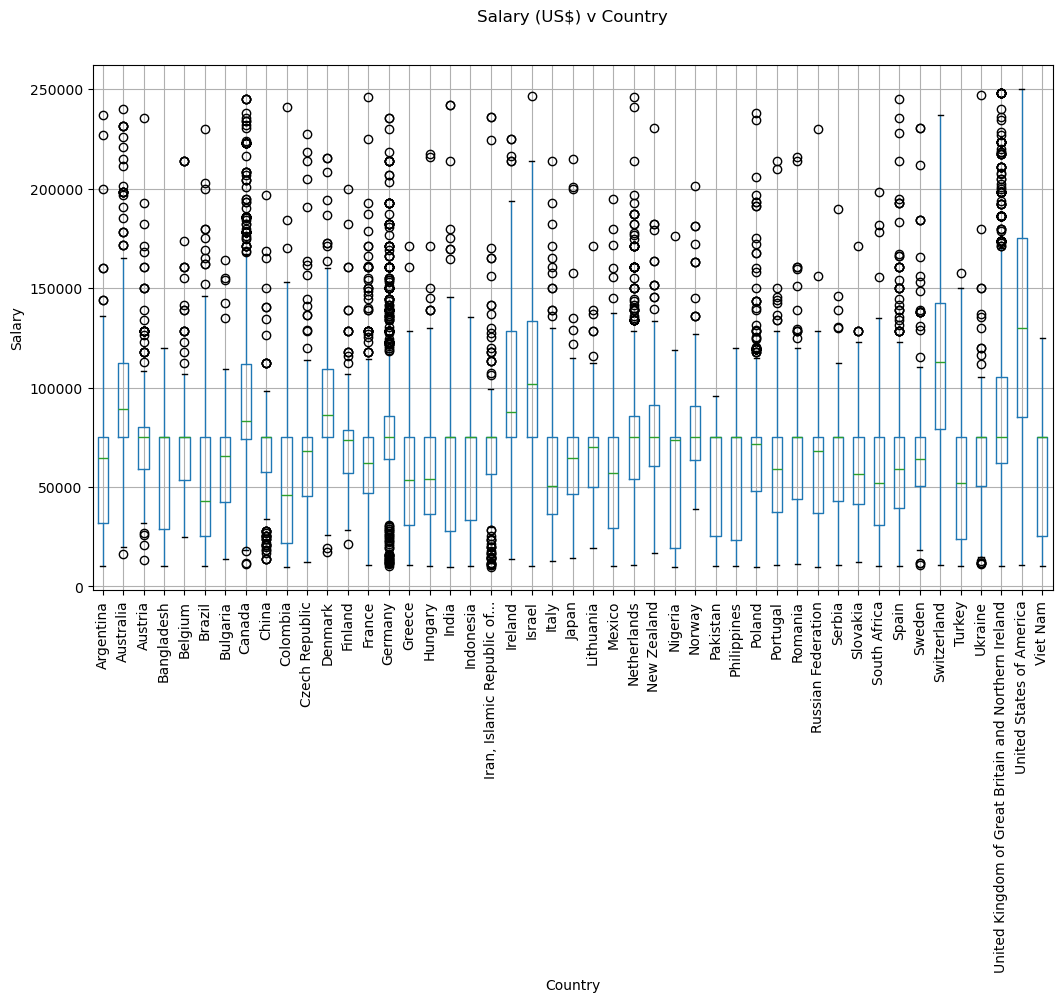

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'Philippines'),
  Text(2, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Africa'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Bangladesh'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Argentina'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Lithuania'),
  Text(15, 0, 'Serbia'),
  Text(16, 0, 'India'),
  Text(17, 0, 'Russian Federation'),
  Text(18, 0, 'Brazil'),
  Text(19, 0, 'Australia'),
  Text(20, 0, 'Greece'),
  Text(21, 0, 'Denmark'),
  Text(22, 0, 'Norway'),
  Text(23, 0, 'Hungary'),
  Text(24, 0, 'Sweden'),
  Text(25, 0, 'Iran, Islamic Republic of...'),
  Text(26, 0,

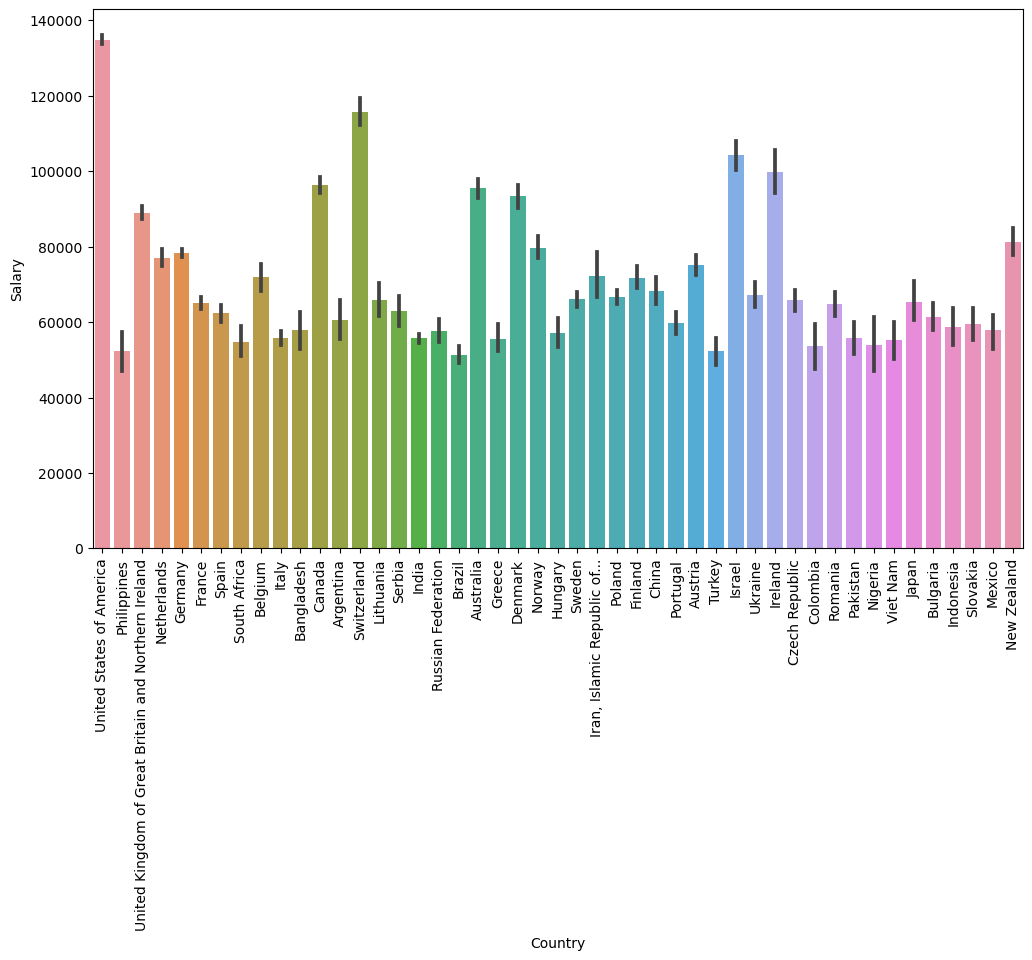

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(x='Country', y='Salary', data=df)
plt.xticks(rotation=90)

In [22]:
df['YearsCodePro'].unique()
#change the strings to floats

array(['23', '4', '21', '3', '9', 'Less than 1 year', '7', '10', '6',
       '14', '2', '15', '13', '28', '11', '5', '8', '25', '16', '12',
       '19', '18', '24', '30', '17', '26', '38', '29', '22', '1', '20',
       '40', '27', '34', '32', '37', '35', '31', '47', '42', '36', '33',
       '44', 'More than 50 years', '45', '41', '39', '43', '46', '49',
       '48', '50'], dtype=object)

In [23]:
def clean_exp(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_exp)

In [24]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland',
       'Netherlands', 'Germany', 'France', 'Spain', 'South Africa',
       'Belgium', 'Italy', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Lithuania', 'Serbia', 'India',
       'Russian Federation', 'Brazil', 'Australia', 'Greece', 'Denmark',
       'Norway', 'Hungary', 'Sweden', 'Iran, Islamic Republic of...',
       'Poland', 'Finland', 'China', 'Portugal', 'Austria', 'Turkey',
       'Israel', 'Ukraine', 'Ireland', 'Czech Republic', 'Colombia',
       'Romania', 'Pakistan', 'Nigeria', 'Viet Nam', 'Japan', 'Bulgaria',
       'Indonesia', 'Slovakia', 'Mexico', 'New Zealand'], dtype=object)

In [25]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'], dtype=object)

In [26]:
def clean_edu(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    elif 'Master’s degree' in x:
        return 'Master’s degree'
    elif 'Professional degree' in x:
        return 'Post grad'
    else:     
        return 'Less than a Bachelors'
df['EdLevel'] = df['EdLevel'].apply(clean_edu)

In [27]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [28]:
df['Industry'].unique()

array(['Information Services, IT, Software Development, or other Technology',
       'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education',
       'Legal Services', 'Insurance', 'Healthcare', 'Oil & Gas',
       'Wholesale', 'Advertising Services'], dtype=object)

In [29]:
df['Industry'].value_counts()

Industry
Information Services, IT, Software Development, or other Technology    14270
Financial Services                                                      3483
Other                                                                   3353
Manufacturing, Transportation, or Supply Chain                          2187
Healthcare                                                              1883
Retail and Consumer Services                                            1624
Higher Education                                                         954
Insurance                                                                608
Advertising Services                                                     604
Oil & Gas                                                                217
Legal Services                                                           176
Wholesale                                                                141
Name: count, dtype: int64

In [30]:
def clean_ind(x):
    if 'Information Services' in x or 'IT' in x or 'Software Development' in x or 'other Technology' in x:
        return 'Technology and Information Services'
    elif 'Financial Services' in x or 'Insurance' in x:
        return 'Finance and Insurance'
    elif 'Manufacturing' in x or 'Transportation' in x or 'Supply Chain' in x:
        return 'Manufacturing, Transportation, and Supply Chain'
    elif 'Healthcare' in x:
        return 'Healthcare'
    elif 'Retail' in x or 'Consumer Services' in x or 'Wholesale' in x:
        return 'Retail and Consumer Services'
    elif 'Higher Education' in x or 'Education' in x:
        return 'Education'
    elif 'Advertising' in x:
        return 'Advertising Services'
    elif 'Legal Services' in x:
        return 'Legal Services'
    elif 'Oil & Gas' in x:
        return 'Energy'
    else:
        return 'Other'

df['Industry'] = df['Industry'].apply(clean_ind)

In [31]:
df['Industry'].value_counts()

Industry
Technology and Information Services                14270
Finance and Insurance                               4091
Other                                               3353
Manufacturing, Transportation, and Supply Chain     2187
Healthcare                                          1883
Retail and Consumer Services                        1765
Education                                            954
Advertising Services                                 604
Energy                                               217
Legal Services                                       176
Name: count, dtype: int64

In [32]:
df = df[df['Industry'] != 'Other']

In [33]:
df

,Country,EdLevel,YearsCodePro,Salary,Industry
2,United States of America,Bachelor’s degree,23.0,250000.0,Technology and Information Services
6,United States of America,Less than a Bachelors,3.0,135000.0,Technology and Information Services
7,United States of America,Bachelor’s degree,3.0,80000.0,Finance and Insurance
13,United States of America,Master’s degree,0.5,150000.0,Technology and Information Services
15,Germany,Master’s degree,10.0,107090.0,"Manufacturing, Transportation, and Supply Chain"
...,...,...,...,...,...
89174,Pakistan,Bachelor’s degree,1.0,74963.0,"Manufacturing, Transportation, and Supply Chain"
89175,United States of America,Bachelor’s degree,8.0,74963.0,Technology and Information Services
89177,Mexico,Master’s degree,11.0,74963.0,Finance and Insurance
89178,United States of America,Bachelor’s degree,22.0,74963.0,Finance and Insurance


In [34]:
from sklearn.preprocessing import OneHotEncoder
one_encode = OneHotEncoder(sparse=False)
industry_one = one_encode.fit_transform(df[['Industry']])

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
industry_one

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
df_ind = pd.DataFrame(industry_one, columns=one_encode.categories_ )
df_ind

,Advertising Services,Education,Energy,Finance and Insurance,Healthcare,Legal Services,"Manufacturing, Transportation, and Supply Chain",Retail and Consumer Services,Technology and Information Services
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26142,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26144,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.preprocessing import OneHotEncoder
cou_encode = OneHotEncoder(sparse=False)
country_one = cou_encode.fit_transform(df[['Country']])
df_cou =  pd.DataFrame(country_one, columns=cou_encode.categories_ )
df_cou

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,China,Colombia,Czech Republic,Denmark,Finland,France,Germany,Greece,Hungary,India,Indonesia,"Iran, Islamic Republic of...",Ireland,Israel,Italy,Japan,Lithuania,Mexico,Netherlands,New Zealand,Nigeria,Norway,Pakistan,Philippines,Poland,Portugal,Romania,Russian Federation,Serbia,Slovakia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
from sklearn.preprocessing import LabelEncoder
label_edu = LabelEncoder()
df['EdLevel'] = label_edu.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [39]:
df_reset = df.reset_index(drop=True)
dfcou_reset = df_cou.reset_index(drop=True)
dfind_reset = df_ind.reset_index(drop=True)

# Concatenate DataFrames along columns
df_combined = pd.concat([df_reset, dfcou_reset, dfind_reset], axis=1)
df_combined

,Country,EdLevel,YearsCodePro,Salary,Industry,"(Argentina,)","(Australia,)","(Austria,)","(Bangladesh,)","(Belgium,)","(Brazil,)","(Bulgaria,)","(Canada,)","(China,)","(Colombia,)","(Czech Republic,)","(Denmark,)","(Finland,)","(France,)","(Germany,)","(Greece,)","(Hungary,)","(India,)","(Indonesia,)","(Iran, Islamic Republic of...,)","(Ireland,)","(Israel,)","(Italy,)","(Japan,)","(Lithuania,)","(Mexico,)","(Netherlands,)","(New Zealand,)","(Nigeria,)","(Norway,)","(Pakistan,)","(Philippines,)","(Poland,)","(Portugal,)","(Romania,)","(Russian Federation,)","(Serbia,)","(Slovakia,)","(South Africa,)","(Spain,)","(Sweden,)","(Switzerland,)","(Turkey,)","(Ukraine,)","(United Kingdom of Great Britain and Northern Ireland,)","(United States of America,)","(Viet Nam,)","(Advertising Services,)","(Education,)","(Energy,)","(Finance and Insurance,)","(Healthcare,)","(Legal Services,)","(Manufacturing, Transportation, and Supply Chain,)","(Retail and Consumer Services,)","(Technology and Information Services,)"
0,United States of America,0,23.0,250000.0,Technology and Information Services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,United States of America,1,3.0,135000.0,Technology and Information Services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,United States of America,0,3.0,80000.0,Finance and Insurance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,United States of America,2,0.5,150000.0,Technology and Information Services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Germany,2,10.0,107090.0,"Manufacturing, Transportation, and Supply Chain",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26142,Pakistan,0,1.0,74963.0,"Manufacturing, Transportation, and Supply Chain",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26143,United States of America,0,8.0,74963.0,Technology and Information Services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26144,Mexico,2,11.0,74963.0,Finance and Insurance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26145,United States of America,0,22.0,74963.0,Finance and Insurance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X = df_combined.drop(['Salary', 'Country', 'Industry'],axis = 1)
y = df_combined['Salary']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

In [42]:
X_train.columns = X_train.columns.astype(str)

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = lin_reg.predict(X_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = np.sqrt(mean_squared_error(y_train,y_pred))
error

35955.57850901243

In [45]:
X_test.columns = X_test.columns.astype(str)
original_values = y_test[:5]

predicted_values = lin_reg.predict(X_test[:5])
comparison_dataFrame = pd.DataFrame(data={'Original values':original_values, 'Predicted values':predicted_values})
comparison_dataFrame['Diffrences'] = comparison_dataFrame['Original values'] - comparison_dataFrame['Predicted values']

In [46]:
comparison_dataFrame

,Original values,Predicted values,Diffrences
2841,74963.0,56079.5,18883.5
7021,107090.0,76648.5,30441.5
14843,58899.0,62786.5,-3887.5
22407,27480.0,54196.0,-26716.0
17523,83530.0,83930.0,-400.0


In [47]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)#random state in other to get thesame result everytime
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
dtpred = dtree.predict(X_train)
tree_mse = mean_squared_error(y_train,dtpred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

27464.02960335972

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtree, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('scores:',scores)
    print('Mean:', scores.mean() )
    print('Standard deviation:', scores.std())
    
display_scores(tree_rmse_scores)

scores: [41709.39210928 42828.37729444 40630.36847223 41664.50738912
 40876.44350974 39517.355776   41905.25813173 40890.68163879
 39381.31086566 41525.02204626]
Mean: 41092.87172332526
Standard deviation: 1013.8487172742816


In [50]:
from sklearn.ensemble import RandomForestRegressor
foreg = RandomForestRegressor(n_estimators=100, random_state=42)
foreg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [51]:
train_predict = foreg.predict(X_train)
forest_mse = mean_squared_error(y_train,train_predict)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

28251.404964133188

In [52]:
from sklearn.model_selection import cross_val_score
for_scores = cross_val_score(foreg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)
for_rmse_scores = np.sqrt(-for_scores)
display_scores(for_rmse_scores)

scores: [38237.20665887 38729.35427555 37823.41361953 38257.1589949
 37678.81095111 36470.20467343 37675.79226887 37275.93978335
 36529.38506811 38145.27680168]
Mean: 37682.25430954059
Standard deviation: 702.3203359032948


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None,2, 4, 6, 8, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



grid_search = GridSearchCV(estimator=dtree, param_grid =param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate on test data
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Best Parameters:", best_params)
print("Root Mean Squared Error:", rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error: 36315.44739899877


In [55]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate on test data
predictions = best_model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)

print("Best Parameters:", best_params)
print("Root Mean Squared Error:", rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error: 34418.84647419222


In [56]:
pd.set_option('display.max_columns', 58)
X_train

,EdLevel,YearsCodePro,"('Argentina',)","('Australia',)","('Austria',)","('Bangladesh',)","('Belgium',)","('Brazil',)","('Bulgaria',)","('Canada',)","('China',)","('Colombia',)","('Czech Republic',)","('Denmark',)","('Finland',)","('France',)","('Germany',)","('Greece',)","('Hungary',)","('India',)","('Indonesia',)","('Iran, Islamic Republic of...',)","('Ireland',)","('Israel',)","('Italy',)","('Japan',)","('Lithuania',)","('Mexico',)","('Netherlands',)","('New Zealand',)","('Nigeria',)","('Norway',)","('Pakistan',)","('Philippines',)","('Poland',)","('Portugal',)","('Romania',)","('Russian Federation',)","('Serbia',)","('Slovakia',)","('South Africa',)","('Spain',)","('Sweden',)","('Switzerland',)","('Turkey',)","('Ukraine',)","('United Kingdom of Great Britain and Northern Ireland',)","('United States of America',)","('Viet Nam',)","('Advertising Services',)","('Education',)","('Energy',)","('Finance and Insurance',)","('Healthcare',)","('Legal Services',)","('Manufacturing, Transportation, and Supply Chain',)","('Retail and Consumer Services',)","('Technology and Information Services',)"
3051,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2958,0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8809,0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13540,0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15380,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18306,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13879,0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21881,2,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24051,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
X = np.array([['Master’s degree', 23, 'Nigeria', 'Energy']])

encoded_countries = cou_encode.transform(X[:, [2]])

# Transform 'industry' column
encoded_industries = one_encode.transform(X[:, [3]])

# Transform 'education' column
encoded_education = label_edu.transform(X[:, 0]).reshape(-1, 1)

# Combine all transformed columns
# Concatenate along axis 1
X_transformed = np.concatenate([
    encoded_education,
    X[:, [1]].astype(float).reshape(-1, 1),  # Keep numerical columns as they are
    encoded_countries,
    encoded_industries
], axis=1)

X_transformed

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[ 2., 23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.]])

In [65]:
ypred = dtree.predict(X_transformed)
ypred

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([74963.])

In [67]:
import pickle
data = {'model': dtree, 'one_cou': cou_encode, 'one_ind': one_encode, 'label_edu': label_edu} 

#then we want to save the regressor,the label encoder for country,and label encoder for education in a dic(data)
# then we open a pickle file in wb(write binary mode) then dump the data in the file(directory)        
with open('soft_pickle.pkl', 'wb') as file:
    pickle.dump(data,file)

In [68]:
with open('soft_pickle.pkl', 'rb') as file:
    data = pickle.load(file)

dtree_load = data['model']
onehot_cou = data['one_cou']
onehot_ind = data['one_ind']
label_edu = data['label_edu']

In [70]:
y_pred = dtree_load.predict(X_transformed)
y_pred

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([74963.])